 ### Option 1: Load CIFAR 10 (Locally) using load_cifar_10.py file

In [117]:
from load_cifar_10 import load_data

In [118]:
(x_train, y_train), (x_test, y_test) = load_data('cifar-10-batches')

In [119]:
print('X_train Shape: ', x_train.shape)
print('X_test Shape: ', x_test.shape)

print('Y_train Shape: ', y_train.shape)
print('Y_test Shape: ', y_test.shape)

X_train Shape:  (50000, 32, 32, 3)
X_test Shape:  (10000, 32, 32, 3)
Y_train Shape:  (50000, 1)
Y_test Shape:  (10000, 1)


### Option 2: Load CIFAR 10 (from Cloud) using keras library

In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('X_train Shape: ', x_train.shape)
print('X_test Shape: ', x_test.shape)

print('Y_train Shape: ', y_train.shape)
print('Y_test Shape: ', y_test.shape)

X_train Shape:  (50000, 32, 32, 3)
X_test Shape:  (10000, 32, 32, 3)
Y_train Shape:  (50000, 1)
Y_test Shape:  (10000, 1)


In [4]:
#step 3
X_train  = x_train.flatten().reshape(50000, 3072) / 255.0
X_test = x_test.flatten().reshape(10000, 3072) / 255.0


In [5]:
#step 4

import tensorflow as tf
Y_train = tf.keras.utils.to_categorical(y_train)
Y_test = tf.keras.utils.to_categorical(y_test)

testeee = tf.one_hot(y_train, depth = 9)
tetstss = tf.one_hot(y_test, depth = 9)

testeee.shape

TensorShape([50000, 1, 9])

In [6]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
Y_test.shape

(10000, 10)

In [8]:
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [9]:
Y_train.shape

(50000, 10)

In [42]:
import numpy as np

#step 5


hidden = 10
labels = 10


bias1 = np.zeros((1, hidden))
bias2 = np.zeros((1, labels))

weights1 = np.random.randn(3072, hidden)
weights2 = np.random.randn(hidden, labels)

weights1.fill(0.0001)
weights2.fill(0.0001)
print(weights2)
epochs = 10
learningrates = 0.005

loss_test_array = []
loss_train_array = []

trainsss = tf.keras.metrics.CategoricalAccuracy()
testsss = tf.keras.metrics.CategoricalAccuracy()

accuracy_train = []
accuracy_test = []

[[0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001]
 [0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001]
 [0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001]
 [0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001]
 [0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001]
 [0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001]
 [0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001]
 [0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001]
 [0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001]
 [0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001]]


In [43]:
def softmax(x):
    return np.exp(x)/sum(np.exp(x))

In [44]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [46]:
for x in range(epochs):
    
    #step 6.1    
    h = sigmoid(np.add(np.dot(X_train, weights1), bias1))
    z_train = softmax(np.add(np.dot(h, weights2), bias2))
    
    h2 = sigmoid(np.add(np.dot(X_test, weights1), bias1))
    z_test = softmax(np.add(np.dot(h2, weights2), bias2))

    #step 6.2
    loss_test = np.sum(-np.multiply(Y_test, np.log(z_test)))
    loss_train = np.sum(-np.multiply(Y_train, np.log(z_train)))
        
    loss_test_array.append(loss_test)
    loss_train_array.append(loss_train)
    
    
    #step 6.3
    deltaW1 = np.dot(np.multiply(np.dot((z_train - Y_train), weights2.T),np.multiply(h, (1 - h))).T, X_train)
    deltaB1 = ((np.multiply(np.dot((z_train - Y_train), weights2.T),np.multiply(h, (1 - h)))))
    deltaW2 =  np.dot((z_train - Y_train).T, h)
    deltaB2 = (z_train-Y_train)
   
    newbias = []
    for x in deltaB1.T:
        num = 0
        tracker = 0
        for number in x:
            num = num + number
        newbias.append(num)
    deltatB1 = np.array([newbias])
    
    #step 6.4
    weights1 = np.subtract(weights1, np.multiply(learningrates,deltaW1.T))
    bias1 = np.subtract(bias1, np.multiply(learningrates, deltatB1))
    weights2 = np.subtract(weights2, np.multiply(learningrates,deltaW2.T))
    bias2 = np.subtract(bias2, np.multiply(learningrates,((np.sum(deltaB2)))))
    

    
    #step 6.5
    trainsss.update_state(Y_train, z_train)
    trainacc = (trainsss.result().numpy())
    
    testsss.update_state(Y_test, z_test)
    testacc = (testsss.result().numpy())
    
    accuracy_test.append(trainacc)
    accuracy_train.append(testacc)

C:\Users\tanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


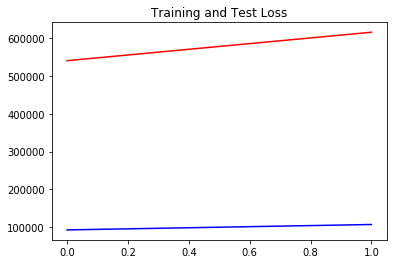

In [47]:
#step7
import matplotlib.pyplot as plt
plt.title('Training and Test Loss')
plt.plot(loss_train_array, color='red', label='Training Data')
plt.plot(loss_test_array, color='blue', label='Test Data')

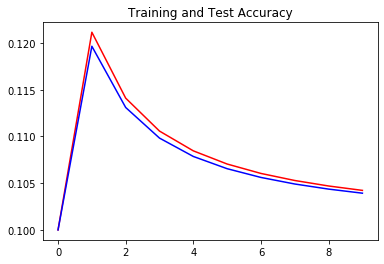

In [48]:
plt.title('Training and Test Accuracy')
plt.plot(accuracy_train, color='red', label='Training Data')
plt.plot(accuracy_test, color='blue', label='Test Data')

In [51]:
from sklearn.metrics import confusion_matrix

ztest = []
for x in z_test:
    t = -1
    maxindex = -1
    temindex = 0
    for y in x:
        if y > t:
            t = y
            maxindex = temindex
        temindex+=1
    ztest.append(maxindex)
        

        
print(confusion_matrix(y_test, ztest))

[[ 82   1  62 504  52 101 140  43   7   8]
 [ 64   3  70 285  93  67 278  87  33  20]
 [ 76   1  96 343  67  41 292  50   8  26]
 [ 50   0  79 263  85  59 325 101  16  22]
 [ 43   2 111 273  55  64 343  88   9  12]
 [ 56   3  63 268  90  61 320  88  18  33]
 [ 56   0 129 221  36  49 386  91  14  18]
 [ 46   3  76 248  62  54 379 103  16  13]
 [ 93   1  54 584  38  74 104  37   7   8]
 [ 48   0  84 381  61  50 309  40   7  20]]


In [272]:
import keras
from keras import layers
from keras.callbacks import TensorBoard

input_img = tf.keras.Input(shape=(32, 32, 3))
 
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
optim = tf.keras.optimizers.SGD(learning_rate=0.1, name='SGD')
autoencoder.compile(optimizer=optim, loss='binary_crossentropy')

scaled_x_train = x_train/255
scaled_x_test = x_test/255 

autoencoder.summary()

autoencoder.fit(scaled_x_train, scaled_x_train,
                epochs=25,
                batch_size=128,
                shuffle=True,
                validation_data=(scaled_x_test, scaled_x_test))

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 8)         

In [299]:
from sklearn.cluster import KMeans
import numpy as np
encoder = keras.Model(input_img,encoded)
encoded_imgs=encoder.predict(scaled_x_train)
encoded_imgs=encoded_imgs.reshape(50000, 128)

kmeans=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10, n_clusters=10, n_init=10, random_state=0, tol=0.0001, verbose=0)

encoded_imgs_fit=kmeans.fit(encoded_imgs)
print(encoded_imgs_fit)
train_predictions = encoded_imgs_fit.cluster_centers_
print(train_predictions)

test_encoder = keras.Model(input_img,encoded)
test_encoded_imgs=test_encoder.predict(scaled_x_test)
test_encoded_imgs=test_encoded_imgs.reshape(10000, 128)

test_kmeans=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10, n_clusters=10, n_init=10, random_state=0, tol=0.0001, verbose=0)

test_encoded_imgs_fit=test_kmeans.fit(test_encoded_imgs)
print(test_encoded_imgs_fit)
test_predictions = test_encoded_imgs_fit.cluster_centers_
print(test_predictions)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
[[1.0085431e-03 1.1417214e-02 8.5323143e-01 ... 6.3388109e-02
  3.0717266e-01 2.5593543e-01]
 [1.9376675e-03 6.0884580e-03 1.2026749e+00 ... 2.0784352e-02
  7.2029757e-01 5.0957620e-01]
 [3.9483402e-03 7.1535558e-03 1.3227166e+00 ... 9.6203811e-02
  1.7676829e-01 1.6181563e-01]
 ...
 [1.8055958e-04 1.3938767e-01 2.4741942e-01 ... 4.1541636e-02
  3.5972258e-01 3.4386161e-01]
 [1.9214803e-04 1.4017862e-01 2.5923371e-01 ... 1.0378281e-01
  6.8675458e-02 1.1658104e-01]
 [9.2985388e-04 2.0325799e-02 9.1296858e-01 ... 4.6496104e-02
  2.7927327e-01 3.4958830e-01]]
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
[[6.1014295e-04 3.2814309e-02 7.7388674e-01 ... 6.951423

In [300]:
from sklearn.metrics import confusion_matrix

In [340]:
labels=encoded_imgs_fit.labels_
test_labels=test_encoded_imgs_fit.labels_

train_confusionmatrix=confusion_matrix(labels, y_train)
test_confusionmatrix=confusion_matrix(test_labels, y_test)

test=0
for row in test_confusionmatrix:
  test+=np.max(row)

train=0
for row in train_confusionmatrix:
  train+=np.max(row)

In [341]:
accuracy_train=(train/50000)*100
accuracy_test=(test/10000)*100

In [345]:
print(train_confusionmatrix)

[[ 470  708 1141  681  974  649  947  826  399  672]
 [ 934  294  757  594  436  606  442  633  408  412]
 [ 492  831  249  295  258  194  139  705  868 1630]
 [ 641  564  152  158  157  121   60  352 1251  923]
 [ 298  247  320  722  560  747  328  566  281  101]
 [ 346  801  420  529  271  712  625  409  434  275]
 [1029  319  427  371  150  260  241  196  314  271]
 [ 117  282  465  594  934  504  626  479  122  114]
 [ 285  515  844  626 1055  412 1447  409  171  252]
 [ 388  439  225  430  205  795  145  425  752  350]]


In [346]:
print(test_confusionmatrix)

[[103 168  50  90  43 153  46  91 147  84]
 [ 43 112 168 118 243  84 304  67  21  48]
 [ 50  41  64 140  96 171  53 121  64  21]
 [ 68 163 191 130 171  96 171 133  92 157]
 [100 106  40  33  15  32  13  68 246 141]
 [190  37 109  99  64 117  50  78  69  54]
 [ 57  98 131 183 204 158 187 122  64  35]
 [123  92 154 109 114 109 112 149  84 105]
 [ 79 130  27  45  42  36  19 140 182 309]
 [187  53  66  53   8  44  45  31  31  46]]


In [347]:
accuracy_test

21.240000000000002

In [348]:
accuracy_train

21.418